In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
#
# @Author: Mingyeong Yang (mmingyeong@kasi.re.kr)
# @Date: 2024-05-22
# @Filename: 240522_prc.ipynb

import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import glob
import os

import pandas as pd
import h5py
import illustris_python as il

### Data
- snapshot data
- TNG300-1
- DM Coordinates
- 99 (z=0)

In [2]:
basePath = '../tng_local/'
snapshot_file_path = glob.glob(f"../tng_local/snapshot-99.*.hdf5")

In [3]:
with h5py.File(snapshot_file_path[0], 'r') as f:
        # hdf5
        PartType1 = f['PartType1']
        dm_pos = PartType1["Coordinates"][:]

len(dm_pos)
type(dm_pos[0,0])

# Example Scripts - Snapshot
# load the spatial Coordinates of all the dark matter particles in the box, and make a quick image with a 2D histogram, projecting out the z-axis.
#plt.hist2d(dm_pos[:,0], dm_pos[:,1], norm=mpl.colors.LogNorm(), bins=64);
#plt.xlim([40000,50000])
#plt.ylim([40000,60000])
#plt.xlabel('x [ckpc/h]')
#plt.ylabel('y [ckpc/h]')

numpy.float64

### 데이터 메모리 효율 향상
1. kpc -> Mpc 단위 변경
2. 데이터 타입 변경 numpy.float64 -> int32
3. Dataframe의 데이터를 to_numpy()로 변경 후 접근하면 매우 빠르게 접근 가능
4. npz로 저장 후 np.load()로 불러와 데이터 접근

In [4]:
len_dt = len(snapshot_file_path)
ID_df = []
x_min = []
x_max = []
y_min = []
y_max = []
z_min = []
z_max = []
len_df = []

for num in range(10):
    print(num)
    ID_df.append(num)
    
    file = f'../tng_local\\snapshot-99.{num}.hdf5'
    f = h5py.File(file, 'r')
    PartType1 = f['PartType1']
    dm_pos = PartType1["Coordinates"][:]
    dm_pos = dm_pos*0.001 # kpc -> Mpc 단위 변경
    dm_pos = dm_pos.astype(np.int32) # 데이터 타입 변경
    
    len_df.append(len(dm_pos))
    x = dm_pos[:, 0]
    x_min.append(min(x))
    x_max.append(max(x))
    
    y = dm_pos[:, 1]
    y_min.append(min(y))
    y_max.append(max(y))
    
    z = dm_pos[:, 2]    
    z_min.append(min(z))
    z_max.append(max(z))


0
1
2
3
4
5
6
7
8
9


In [5]:
dm_df = pd.DataFrame({"ID":ID_df, "x_min [cMpc/h]":x_min, "x_max [cMpc/h]":x_max, "y_min [cMpc/h]":y_min, "y_max [cMpc/h]":y_max, "z_min [cMpc/h]":z_min, "z_max [cMpc/h]":z_max, "len": len_df})
dm_df

,ID,x_min [cMpc/h],x_max [cMpc/h],y_min [cMpc/h],y_max [cMpc/h],z_min [cMpc/h],z_max [cMpc/h],len
0,0,41,47,45,54,143,150,25680412
1,1,41,83,45,122,143,196,25641998
2,2,78,121,65,122,190,197,25941178
3,3,83,135,35,84,34,197,25794343
4,4,45,137,34,74,32,145,25925935
5,5,45,200,69,114,141,201,25755737
6,6,46,200,6,192,96,201,26113564
7,7,0,204,6,168,60,196,25896404
8,8,0,204,22,169,59,193,26123423
9,9,91,171,21,177,79,166,26350445


<Axes: >

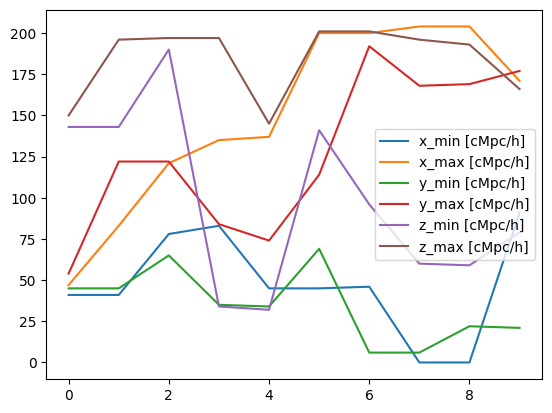

In [6]:
dm_df.plot(y=["x_min [cMpc/h]", "x_max [cMpc/h]", "y_min [cMpc/h]", "y_max [cMpc/h]", "z_min [cMpc/h]", "z_max [cMpc/h]"])